 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [324]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline
import seaborn as sns

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [325]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")

# YOUR CODE HERE

whale_returns = pd.read_csv(whale_returns_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [326]:
# Count nulls
# YOUR CODE HERE

whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [327]:
# Drop nulls
# YOUR CODE HERE

whale_returns_clean = whale_returns.dropna()
whale_returns_clean.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [328]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")

# YOUR CODE HERE

algo_returns = pd.read_csv(algo_returns_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [329]:
# Count nulls
# YOUR CODE HERE

algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [330]:
# Drop nulls
# YOUR CODE HERE

algo_returns_clean = algo_returns.dropna()
algo_returns_clean

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [331]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")

# YOUR CODE HERE

sp500_history = pd.read_csv(sp500_history_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
sp500_history

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [332]:
# Check Data Types
# YOUR CODE HERE

type(sp500_history['Close'][0])

str

In [333]:
# Fix Data Types
# YOUR CODE HERE

sp500_history['Close'] = sp500_history['Close'].str.replace('$','')
sp500_history['Close'] = sp500_history['Close'].astype(float)
type(sp500_history['Close'][0])

numpy.float64

In [334]:
# Calculate Daily Returns
# YOUR CODE HERE


sp500_daily_returns = sp500_history['Close'].pct_change()
sp500_daily_returns

Date
2019-04-23         NaN
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
                ...   
2012-10-05    0.003469
2012-10-04    0.000322
2012-10-03   -0.007123
2012-10-02   -0.003611
2012-10-01   -0.000872
Name: Close, Length: 1649, dtype: float64

In [335]:
# Drop nulls
# YOUR CODE HERE

sp500_daily_returns.isnull().sum()
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.head()

Date
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
2019-04-15   -0.000509
Name: Close, dtype: float64

In [336]:
# Rename Column
# YOUR CODE HERE

'''
sp500_returns2 = pd.DataFrame(sp500_daily_returns)
sp500_returns2.rename(columns={'Close':'Daily Returns'})
sp500_returns2.head()
'''

col_name = ['Daily Returns']
sp500_returns = pd.DataFrame(sp500_daily_returns)
sp500_returns.columns = col_name
sp500_returns.head()

,Daily Returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [337]:
#print(whale_returns_clean['Date'][0], whale_returns_clean['Date'][-1])
#print(algo_returns_clean['Date'][0], algo_returns_clean['Date'][-1])
#print(sp500_returns['Date'][0], sp500_returns['Date'][-1])

In [338]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE

combined = pd.concat([whale_returns_clean, algo_returns_clean, sp500_returns], axis='columns', join='inner')
combined.sort_index(inplace=True)
combined

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

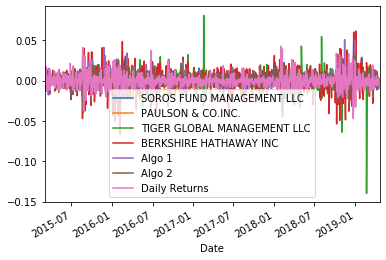

In [339]:
# Plot daily returns
# YOUR CODE HERE

#daily_returns = combined
combined.plot()

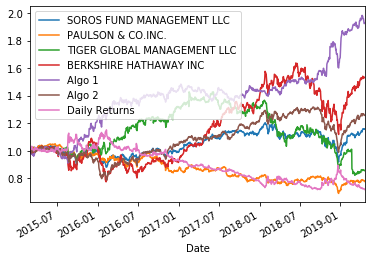

In [340]:
# Plot cumulative returns
# YOUR CODE HERE

cumulative_returns = (1 + combined).cumprod()
cumulative_returns.plot()

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

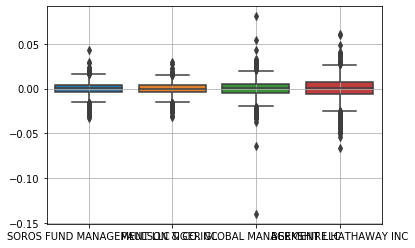

In [341]:
# Box plot to visually show risk
# YOUR CODE HERE

bplot = sns.boxplot(data=whale_returns_clean).grid(True)

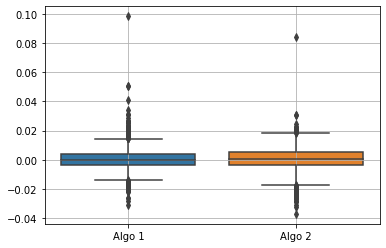

In [342]:
bplot2 = sns.boxplot(data=algo_returns_clean).grid(True)

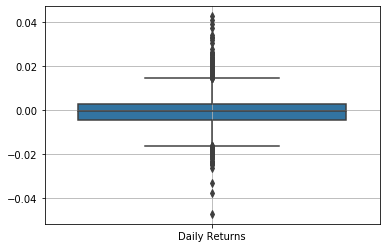

In [343]:
bplot3 = sns.boxplot(data=sp500_returns).grid(True)

In [344]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE

'''
whale_returns.rolling(window=7).std().plot() + algo_returns.rolling(window=7).std().plot() + sp500_returns.rolling(window=7).std().plot()
print(algo_returns.rolling(window=7).std().mean() * 1000)
'''

whale_returns_std = whale_returns_clean.rolling(window=2).std().mean()*100
algo_returns_std = algo_returns_clean.rolling(window=2).std().mean()*100
sp500_returns_std = sp500_returns.rolling(window=2).std().mean()*100

combined_std = pd.concat([whale_returns_std, algo_returns_std, sp500_returns_std])

def std_comparison():
    n = 0
    for i in combined_std:
        if i > combined_std['Daily Returns']:
            print(f"{combined_std.index[n]} has a greater standard deviation than the S&P 500 which is {combined_std['Daily Returns']}")
        n += 1
        
std_comparison()

TIGER GLOBAL MANAGEMENT LLC has a greater standard deviation than the S&P 500 which is 0.589049517709086
BERKSHIRE HATHAWAY INC has a greater standard deviation than the S&P 500 which is 0.589049517709086
Algo 2 has a greater standard deviation than the S&P 500 which is 0.589049517709086


In [345]:
whale_returns_std = whale_returns_clean.std()*100
algo_returns_std = algo_returns_clean.std()*100
sp500_returns_std = sp500_returns.std()*100

combined_std = pd.concat([whale_returns_std, algo_returns_std, sp500_returns_std])

def std_comparison():
    n = 0
    for i in combined_std:
        if i > combined_std['Daily Returns']:
            print(f"{combined_std.index[n]} has a greater standard deviation than the S&P 500 which is {combined_std['Daily Returns']}")
        n += 1
        
std_comparison()

TIGER GLOBAL MANAGEMENT LLC has a greater standard deviation than the S&P 500 which is 0.8134642617809523
BERKSHIRE HATHAWAY INC has a greater standard deviation than the S&P 500 which is 0.8134642617809523
Algo 2 has a greater standard deviation than the S&P 500 which is 0.8134642617809523


In [346]:
#whale_returns = pd.read_csv(whale_returns_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
'''
col_name = ['Daily Returns']
sp500_returns = pd.DataFrame(sp500_daily_returns)
sp500_returns.columns = col_name
sp500_returns.head()
'''


std_df = pd.DataFrame(combined_std)
std_df_col_name = ['STD']
std_df.columns = std_df_col_name
std_df

,STD
SOROS FUND MANAGEMENT LLC,0.784196
PAULSON & CO.INC.,0.697687
TIGER GLOBAL MANAGEMENT LLC,1.082428
BERKSHIRE HATHAWAY INC,1.283077
Algo 1,0.798771
Algo 2,0.846646
Daily Returns,0.813464


In [347]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE

std_comparison()

TIGER GLOBAL MANAGEMENT LLC has a greater standard deviation than the S&P 500 which is 0.8134642617809523
BERKSHIRE HATHAWAY INC has a greater standard deviation than the S&P 500 which is 0.8134642617809523
Algo 2 has a greater standard deviation than the S&P 500 which is 0.8134642617809523


In [348]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE

whale_annual_std = whale_returns_clean.rolling(window=2).std().mean()*np.sqrt(252)*100
algo_annual_std = algo_returns_clean.rolling(window=2).std().mean()*np.sqrt(252)*100
sp500_annual_std = sp500_returns.rolling(window=2).std().mean()*np.sqrt(252)*100

annual_std_combined = pd.concat([whale_annual_std, algo_annual_std, sp500_annual_std])
annual_std_combined

SOROS FUND MANAGEMENT LLC       8.846968
PAULSON & CO.INC.               7.998700
TIGER GLOBAL MANAGEMENT LLC    11.351996
BERKSHIRE HATHAWAY INC         14.902267
Algo 1                          8.239608
Algo 2                          9.521067
Daily Returns                   9.350871
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

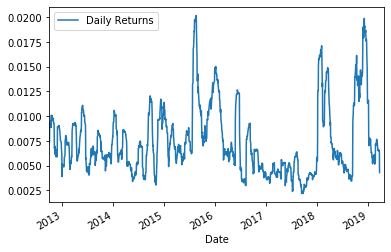

In [349]:
# Calculate and plot the rolling standard deviation for the S&P 500 using a 21 day window
# YOUR CODE HERE

sp500_annual_std = sp500_returns.rolling(window=21).std()#.mean()*np.sqrt(252)*1000
sp500_annual_std.plot()

In [350]:
# Correlation
# YOUR CODE HERE

soros_fund = pd.DataFrame(whale_returns_clean['SOROS FUND MANAGEMENT LLC'])
paulson_fund = pd.DataFrame(whale_returns_clean['PAULSON & CO.INC. '])
tiger_fund = pd.DataFrame(whale_returns_clean['TIGER GLOBAL MANAGEMENT LLC'])
berkshire = pd.DataFrame(whale_returns_clean['BERKSHIRE HATHAWAY INC'])
algo1_fund = pd.DataFrame(algo_returns_clean['Algo 1'])
algo2_fund = pd.DataFrame(algo_returns_clean['Algo 2'])
sp500 = pd.DataFrame(sp500_returns['Daily Returns'])

soros_corr = pd.concat([soros_fund, sp500], axis='columns', join='inner').corr()
paulson_corr = pd.concat([paulson_fund, sp500], axis='columns', join='inner').corr()
tiger_corr = pd.concat([tiger_fund, sp500], axis='columns', join='inner').corr()
berkshire = pd.concat([berkshire, sp500], axis='columns', join='inner').corr()
algo1_fund = pd.concat([algo1_fund, sp500], axis='columns', join='inner').corr()
algo2_fund = pd.concat([algo2_fund, sp500], axis='columns', join='inner').corr()

market_corr = pd.concat([soros_corr, paulson_corr, tiger_corr, berkshire, algo1_fund, algo2_fund], axis='columns', join='inner')

print(soros_corr,'\n\n',
      paulson_corr,'\n\n',
      tiger_corr,'\n\n',
      berkshire,'\n\n',
      algo1_fund,'\n\n',
      algo2_fund)

                           SOROS FUND MANAGEMENT LLC  Daily Returns
SOROS FUND MANAGEMENT LLC                   1.000000       0.000574
Daily Returns                               0.000574       1.000000 

                     PAULSON & CO.INC.   Daily Returns
PAULSON & CO.INC.             1.000000       0.013549
Daily Returns                 0.013549       1.000000 

                              TIGER GLOBAL MANAGEMENT LLC  Daily Returns
TIGER GLOBAL MANAGEMENT LLC                     1.000000      -0.001505
Daily Returns                                  -0.001505       1.000000 

                         BERKSHIRE HATHAWAY INC  Daily Returns
BERKSHIRE HATHAWAY INC                1.000000      -0.013856
Daily Returns                        -0.013856       1.000000 

                  Algo 1  Daily Returns
Algo 1         1.000000      -0.048003
Daily Returns -0.048003       1.000000 

                  Algo 2  Daily Returns
Algo 2         1.000000      -0.011537
Daily Returns -0.01153

In [351]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE

covariance = whale_returns_clean['BERKSHIRE HATHAWAY INC'].cov(sp500_returns['Daily Returns'])
#covariance

variance = whale_returns_clean['BERKSHIRE HATHAWAY INC'].var()
#variance

beta = covariance/variance
beta

-0.009336829601298465

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [352]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [353]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

sharpe_ratio = (combined.mean()*252) / (combined.std()*np.sqrt(252))

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

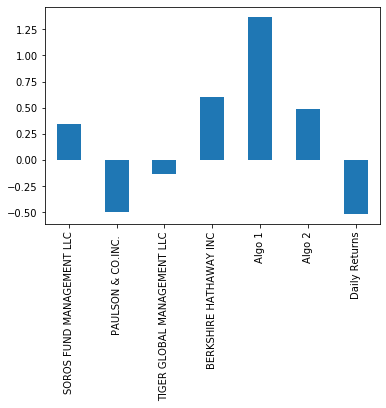

In [354]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

sharpe_ratio.plot(kind='bar')

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [371]:
# Read the first stock
# YOUR CODE HERE

bk_data = Path('../Resources/bk_data.csv')
bk_df = pd.read_csv(bk_data, index_col='date', infer_datetime_format=True, parse_dates=True)

bk_df.head()

,close
date,
2019-05-20,45.97
2019-05-17,46.08
2019-05-16,46.54
2019-05-15,46.51
2019-05-14,47.01


In [372]:
# Read the second stock
# YOUR CODE HERE

jnj_data = Path('../Resources/jnj_data.csv')
jnj_df = pd.read_csv(jnj_data, index_col='date', infer_datetime_format=True, parse_dates=True)

jnj_df.head()

,close
date,
2015-06-23,99.78
2015-06-24,99.33
2015-06-25,99.12
2015-06-26,99.64
2015-06-29,97.68


In [373]:
# Read the third stock
# YOUR CODE HERE

nke_data = Path('../Resources/nke_data.csv')
nke_df = pd.read_csv(nke_data, index_col='date', infer_datetime_format=True, parse_dates=True)

nke_df.head()

,close
date,
2019-05-20,82.85
2019-05-17,84.57
2019-05-16,84.28
2019-05-15,84.01
2019-05-14,83.67


In [374]:
# Read the fourth stock
# YOUR CODE HERE

sbux_data = Path('../Resources/sbux_data.csv')
sbux_df = pd.read_csv(sbux_data, index_col='date', infer_datetime_format=True, parse_dates=True)

sbux_df.head()

,close
date,
2019-05-20,76.66
2019-05-17,78.91
2019-05-16,78.90
2019-05-15,77.76
2019-05-14,77.06


In [375]:
# Read the fifth stock
# YOUR CODE HERE

t_data = Path('../Resources/t_data.csv')
t_df = pd.read_csv(t_data, index_col='date', infer_datetime_format=True, parse_dates=True)

t_df.head()

,close
date,
2019-05-20,32.19
2019-05-17,31.80
2019-05-16,31.62
2019-05-15,31.25
2019-05-14,31.09


In [376]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

basket = pd.concat([bk_df, jnj_df, nke_df, sbux_df, t_df], axis='columns', join='inner')
basket.head()

,close,close,close,close,close
date,,,,,
2019-05-20,45.97,138.42,82.85,76.66,32.19
2019-05-17,46.08,138.61,84.57,78.91,31.80
2019-05-16,46.54,138.21,84.28,78.90,31.62
2019-05-15,46.51,136.91,84.01,77.76,31.25
2019-05-14,47.01,136.82,83.67,77.06,31.09


In [377]:
# Reset the index
# YOUR CODE HERE

basket.set_index('date')
basket.head()

KeyError: "None of ['date'] are in the columns"

In [394]:
# Drop Nulls
# YOUR CODE HERE

basket.dropna(inplace=True)
basket.isnull().sum()

close    0
close    0
close    0
close    0
close    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [395]:
# Calculate weighted portfolio returns
weights = [1/5, 1/5, 1/5, 1/5, 1/5]
# YOUR CODE HERE

daily_returns = basket.pct_change().dropna()
portfolio_roi = daily_returns.dot(weights)

portfolio_roi = pd.DataFrame(portfolio_roi)
portfolio_roi_columns = ['Portfolio']
portfolio_roi.columns = portfolio_roi_columns


portfolio_roi.head()

,Portfolio
date,
2019-05-17,0.008352
2019-05-16,-0.000424
2019-05-15,-0.007881
2019-05-14,-0.001615
2019-05-13,-0.006549


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [405]:
# YOUR CODE HERE

market = pd.concat([combined, portfolio_roi], axis='columns', join='inner')
#market.rename(columns={'0':'Portfolio'})
market.sort_index(inplace=True)
market.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns,Portfolio
2015-06-23,0.000872,0.001200,-0.000383,0.003067,0.003054,0.001970,0.007408,0.006695
2015-06-24,-0.005694,-0.004625,-0.009463,-0.005725,0.003790,-0.007286,0.002982,0.000835
2015-06-25,0.001699,0.001595,-0.001646,-0.008247,-0.007598,-0.000048,0.000390,-0.011516
2015-06-26,-0.010598,-0.004986,0.003986,-0.005103,0.003362,-0.002704,0.021311,0.019451
2015-06-29,-0.019129,-0.006835,-0.019384,-0.019997,0.000903,-0.023736,-0.002651,0.000111


In [406]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE

market.dropna(inplace=True)
market.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
Daily Returns                  0
Portfolio                      0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [407]:
# Risk
# YOUR CODE HERE

market_std = market.std()*100

def std_comparison():
    n = 0
    for i in market_std:
        if i > market_std['Portfolio']:
            print(f"{market_std.index[n]} has a greater standard deviation than the S&P 500 which is {market_std['Portfolio']}")
        n += 1
        
std_comparison()

TIGER GLOBAL MANAGEMENT LLC has a greater standard deviation than the S&P 500 which is 0.8876457994403515
BERKSHIRE HATHAWAY INC has a greater standard deviation than the S&P 500 which is 0.8876457994403515


In [410]:
# Rolling
# YOUR CODE HERE

market_std = market.rolling(window=2).std().mean()*100


def std_comparison():
    n = 0
    for i in market_std:
        if i > market_std['Portfolio']:
            print(f"{market_std.index[n]} has a greater annual standard deviation than the S&P 500 which is {market_std['Portfolio']}")
        n += 1
        
std_comparison()

TIGER GLOBAL MANAGEMENT LLC has a greater annual standard deviation than the S&P 500 which is 0.6504137584784548
BERKSHIRE HATHAWAY INC has a greater annual standard deviation than the S&P 500 which is 0.6504137584784548


In [409]:
# Beta
# YOUR CODE HERE

covariance = market['Portfolio'].cov(market['Portfolio'])
#covariance

variance = market['Portfolio'].var()
#variance

beta = covariance/variance
beta

1.0000000000000004

In [414]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

sharpe_ratio = (market.mean()*252) / (market.std()*np.sqrt(252))

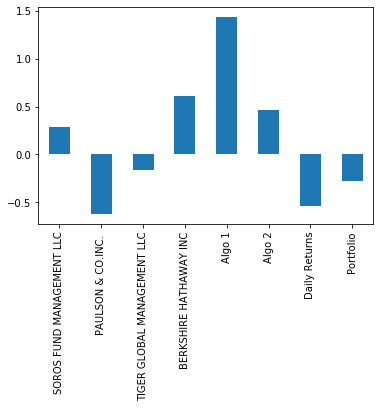

In [415]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

sharpe_ratio.plot(kind='bar')

## Include correlation analysis to determine which stocks (if any) are correlated

In [369]:
# YOUR CODE HERE

In [416]:
sp500 = pd.DataFrame(sp500_returns['Daily Returns'])

bk_t_corr = pd.concat([bk_df, t_df], axis='columns', join='inner').corr()
jnj_t_corr = pd.concat([jnj_df, t_df], axis='columns', join='inner').corr()
nke_t_corr = pd.concat([nke_df, t_df], axis='columns', join='inner').corr()
sbux_t_corr = pd.concat([sbux_df, t_df], axis='columns', join='inner').corr()
t_sp_corr = pd.concat([t_df, sp500], axis='columns', join='inner').corr()


print(bk_t_corr,'\n\n',
      jnj_t_corr,'\n\n',
      nke_t_corr,'\n\n',
      sbux_t_corr,'\n\n',
      t_sp_corr)

          close     close
close  1.000000  0.437713
close  0.437713  1.000000 

           close     close
close  1.000000  0.082751
close  0.082751  1.000000 

           close     close
close  1.000000  0.487368
close  0.487368  1.000000 

           close     close
close  1.000000  0.647923
close  0.647923  1.000000 

                   close  Daily Returns
close          1.000000       0.016893
Daily Returns  0.016893       1.000000
